This file is based on the development of Convolutional Neural Network for image classification using TensorFlow library. For this purpose, Intel Image dataset is used from Kaggle website: https://www.kaggle.com/puneet6060/intel-image-classification

In [1]:
%matplotlib inline
import random
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
import cv2
import os

_path = 'D:\CHAKSHU\AAEN.705.601.82.AppliedML\Data'
IMGSIZE = (128, 128)
CNAMES = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
X_tr, y_tr, X_ts, y_ts = [], [], [], []
for label in CNAMES:
    path = _path + '\seg_train\\' + label
    for f in sorted([_ for _ in os.listdir(path) if _.lower().endswith('.jpg')]):
        X_tr += [cv2.resize(cv2.imread(os.path.join(path,f)), IMGSIZE)]
        y_tr += [CNAMES.index(label)]

In [3]:
for label in CNAMES:
    path = _path + '\seg_test\\' + label
    for f in sorted([_ for _ in os.listdir(path) if _.lower().endswith('.jpg')]):
        X_ts += [cv2.resize(cv2.imread(os.path.join(path,f)), IMGSIZE)]
        y_ts += [CNAMES.index(label)]

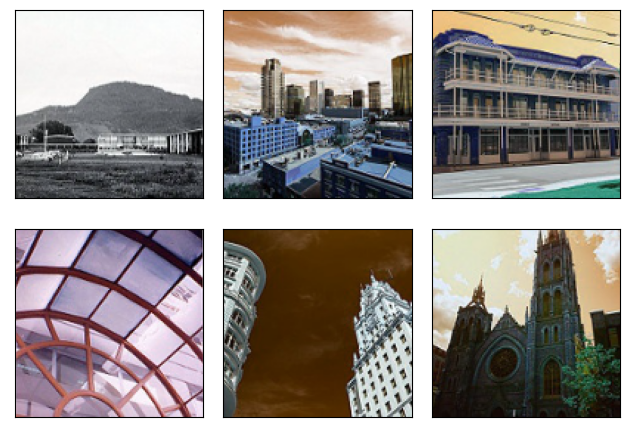

In [4]:
#Viewing the dataset

fig, ax = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(6):
    img = X_tr[i]
    ax[i].imshow(img)
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    plt.tight_layout()
plt.show()

In [5]:
#Image

print(X_tr[0])

[[[245 247 247]
  [245 247 247]
  [246 248 248]
  ...
  [248 248 248]
  [246 247 247]
  [245 247 247]]

 [[244 246 246]
  [245 247 247]
  [245 247 247]
  ...
  [248 248 248]
  [246 247 247]
  [245 247 247]]

 [[244 246 246]
  [244 246 246]
  [245 247 247]
  ...
  [248 248 248]
  [246 247 247]
  [245 247 247]]

 ...

 [[ 47  49  50]
  [ 55  57  58]
  [ 65  67  68]
  ...
  [ 58  61  66]
  [ 38  41  46]
  [ 60  63  68]]

 [[ 65  66  67]
  [ 46  48  49]
  [ 67  69  70]
  ...
  [ 33  36  41]
  [ 38  41  47]
  [ 45  48  53]]

 [[ 57  59  60]
  [ 52  54  55]
  [ 68  70  71]
  ...
  [ 29  32  37]
  [ 38  41  46]
  [ 52  55  60]]]


In [6]:
#Color channels

X_tr[0][0][0]

array([245, 247, 247], dtype=uint8)

There are three color channels represented by the columns storing the values from 0 to 255. These are in the order-BGR when read using cv2. Matplotlib stores it in RGB order.

In [7]:
#Dimensions

print(len(X_tr))
print()
print(len(X_tr[0]))
print()
print(len(X_tr[0][0]))
print()
print(len(X_tr[0][0][0]))
print()

14034

128

128

3



In [8]:
#Dimensions

print(len(X_ts))
print()
print(len(X_ts[0]))
print()
print(len(X_ts[0][0]))
print()
print(len(X_ts[0][0][0]))
print()

3000

128

128

3



In [9]:
#Converting to array

X_tr = np.asarray(X_tr)
X_ts = np.asarray(X_ts)
y_tr = np.asarray(y_tr)
y_ts = np.asarray(y_ts)

In [10]:
#Converting to N*M matrix for the next step

X_tr = X_tr.reshape(14034, 49152)
X_ts = X_ts.reshape(3000, 49152)

In [11]:
#Normalizing the dataset

scaler = preprocessing.MinMaxScaler()
X_tr = scaler.fit_transform(X_tr)
X_ts = scaler.fit_transform(X_ts)

In [12]:
#Converting to original dimensions

X_tr = X_tr.reshape(14034, 128, 128, 3)
X_ts = X_ts.reshape(3000, 128, 128, 3)

In [13]:
#Sanity check

X_tr.shape

(14034, 128, 128, 3)

In [14]:
# Clear session
tf.keras.backend.clear_session()

In [15]:
#CNN neural network
cnn1 = tf.keras.Sequential()

cnn1.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5), input_shape=(128, 128, 3),
    data_format='channels_last',
    name='conv_1', activation='relu'))

cnn1.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), name='pool_1'))


cnn1.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(5, 5),
    name='conv_2', activation='relu'))

cnn1.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), name='pool_2'))

# parameter size computed from the previous image sizes and pooling layers
cnn1.add(tf.keras.layers.Flatten())

cnn1.add(tf.keras.layers.Dense(units=256, name='fc_1', activation='relu'))

cnn1.add(tf.keras.layers.Dense(units=6, name='fc_2', activation='softmax'))

In [16]:
# Set a seed for repeatability
tf.random.set_seed(0)

# Build the model
cnn1.build(input_shape=(None, 128, 128, 3))

# Compile the model with the optimizer, loss function and metric
cnn1.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy'])

NUM_EPOCHS = 10

In [17]:
# Save weights for debugging purposes and saving the model
cnn1.save_weights('cnn1_weights.h5')

In [18]:
%%time
history = cnn1.fit(X_tr, y_tr,
                   epochs=NUM_EPOCHS,
                   shuffle=True)

Epoch 1/10
439/439 [==============================] - 144s 322ms/step - loss: 0.9726 - accuracy: 0.6343
Epoch 2/10
439/439 [==============================] - 139s 317ms/step - loss: 0.6308 - accuracy: 0.7688
Epoch 3/10
439/439 [==============================] - 139s 316ms/step - loss: 0.4349 - accuracy: 0.8430
Epoch 4/10
439/439 [==============================] - 133s 303ms/step - loss: 0.2747 - accuracy: 0.9047
Epoch 5/10
439/439 [==============================] - 138s 313ms/step - loss: 0.1580 - accuracy: 0.9476
Epoch 6/10
439/439 [==============================] - 134s 305ms/step - loss: 0.1115 - accuracy: 0.9637
Epoch 7/10
439/439 [==============================] - 135s 307ms/step - loss: 0.0748 - accuracy: 0.9768
Epoch 8/10
439/439 [==============================] - 137s 312ms/step - loss: 0.0650 - accuracy: 0.9804
Epoch 9/10
439/439 [==============================] - 148s 337ms/step - loss: 0.0493 - accuracy: 0.9859
Epoch 10/10
439/439 [==============================] - 141s 321m

In [19]:
# Testing dataset
y_pred = np.argmax(cnn1.predict(X_ts), axis=1)
print(f'Accuracy= {sum(y_pred==y_ts)/len(X_ts):.3f}')

94/94 [==============================] - 7s 70ms/step
Accuracy= 0.760


In [20]:
# Clear session
tf.keras.backend.clear_session()

In [21]:
#CNN neural network with drop-out
cnn1 = tf.keras.Sequential()

cnn1.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5), input_shape=(128, 128, 3),
    data_format='channels_last',
    name='conv_1', activation='relu'))

cnn1.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), name='pool_1'))


cnn1.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(5, 5),
    name='conv_2', activation='relu'))

cnn1.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), name='pool_2'))

# parameter size computed from the previous image sizes and pooling layers
cnn1.add(tf.keras.layers.Flatten())

cnn1.add(tf.keras.layers.Dense(units=256, name='fc_1', activation='relu'))

cnn1.add(tf.keras.layers.Dropout(0.1))

cnn1.add(tf.keras.layers.Dense(units=6, name='fc_2', activation='softmax'))

In [22]:
# Set a seed for repeatibility
tf.random.set_seed(0)

# Build the model
cnn1.build(input_shape=(None, 128, 128, 3))

# Compile the model with the optimizer, loss function and metric
cnn1.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy'])

NUM_EPOCHS = 10

In [23]:
%%time
history = cnn1.fit(X_tr, y_tr,
                   epochs=NUM_EPOCHS,
                   shuffle=True)

Epoch 1/10
439/439 [==============================] - 146s 326ms/step - loss: 0.9748 - accuracy: 0.6299
Epoch 2/10
439/439 [==============================] - 146s 332ms/step - loss: 0.6477 - accuracy: 0.7660
Epoch 3/10
439/439 [==============================] - 149s 338ms/step - loss: 0.4294 - accuracy: 0.8424
Epoch 4/10
439/439 [==============================] - 136s 310ms/step - loss: 0.2716 - accuracy: 0.9040
Epoch 5/10
439/439 [==============================] - 137s 312ms/step - loss: 0.1567 - accuracy: 0.9502
Epoch 6/10
439/439 [==============================] - 141s 322ms/step - loss: 0.0991 - accuracy: 0.9695
Epoch 7/10
439/439 [==============================] - 143s 327ms/step - loss: 0.0693 - accuracy: 0.9793
Epoch 8/10
439/439 [==============================] - 138s 314ms/step - loss: 0.0567 - accuracy: 0.9839
Epoch 9/10
439/439 [==============================] - 143s 327ms/step - loss: 0.0544 - accuracy: 0.9831
Epoch 10/10
439/439 [==============================] - 143s 325m

In [24]:
# Testing dataset
y_pred = np.argmax(cnn1.predict(X_ts), axis=1)
print(f'Accuracy= {sum(y_pred==y_ts)/len(X_ts):.3f}')

94/94 [==============================] - 7s 75ms/step
Accuracy= 0.768


The best performance for test set is after adding drop out in the fully connected layer; accuracy = 76.8%.